# Quality Coffee Analysis with Python

Coffee quality analysis involves various parameters that are assessed to determine the overall quality of coffee. These parameters provide valuable insights into the characteristics and flavor profile of the coffee. Here is a summary of some commonly used coffee quality analysis parameters and their mean values:

* Acidity: Acidity refers to the sharp, tangy taste in coffee and is an important factor in determining its overall flavor. The mean acidity value for high-quality coffee typically falls within the range of 7 to 9 on a scale of 1 to 10.

* Body: Body describes the physical sensation and weight of the coffee in the mouth. It can range from light and delicate to full and heavy. The mean body value for good-quality coffee generally falls between 6 and 8.

* Aroma: Aroma relates to the fragrance and smell of the coffee. It encompasses a wide range of scents, including floral, fruity, nutty, and chocolaty notes. The mean aroma value for excellent coffee usually ranges from 8 to 9.

* Flavor: Flavor encompasses the overall taste experience of the coffee, including the combination of acidity, sweetness, bitterness, and other characteristic notes. The mean flavor value for top-quality coffee is typically around 8.

* Balance: Balance refers to the harmony and integration of different flavors in the coffee. It is the proper blending of acidity, sweetness, and bitterness, resulting in a well-rounded and pleasant cup. The mean balance value for premium coffee generally falls between 7 and 9.

* Aftertaste: Aftertaste is the lingering taste that remains in the mouth after swallowing the coffee. A desirable aftertaste is long-lasting, clean, and enjoyable. The mean aftertaste value for high-quality coffee typically ranges from 7 to 9.

It's important to note that these mean values are general guidelines, and coffee quality can vary based on various factors such as origin, processing methods, roast level, and personal preferences. Additionally, coffee quality analysis often involves a sensory evaluation by trained professionals who assess these parameters subjectively, considering their individual expertise and taste preferences. 

As always it's useful for the market and for the coffee shops to identify which coffee has the better quality to buy, to sell and also to make a good cup of coffee; by making this analysis we can gain insights about the quality parameters and the coffee cups that are around the world and also to see what parameters makes an excellent coffee cup based on the Internation Quality Coffee Association. Let's dive deep in this analysis to see what makes a good cup of coffee.

To make the analysis we are going to need some important libraries of data analysis. The most common ones are the: 
1. **Numpy:** this library it's the most important one to work with list, tuples and linear algebra. 
2. **Pandas:** this library can be used to work with the Dataframe format: table format of information. 
3. **Matplotlib:** this library it's one of the most used around the data analysis for data visualization. 
4. **Seaborn:** basing also in matplotlib this library allows to make data visualization using the dataframe format for information

In [2]:
#Importing data analysis libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Now for importing the dataset to the working space we use the attribute of pandas library **read_csv** which allows to upload a csv file and reads it as a dataframe format. Later with the **head** attribute we can visualize the first columns of the dataset for a quick visualization of the information in the table format. 

In [3]:
#Importing information for data analysis: dataset quality coffee parameters
df_quality_coffee = pd.read_csv('df_arabica_clean.csv', header=0, delimiter=',')
df_quality_coffee.head(10)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
5,5,5,Guatemala,La Colina,"The 2022 Pacific Rim Coffee Summit,GT02",Dinámica Café,NaN,Taiwan Coffee Laboratory,1668,Chimaltenango,...,87.00,10.7,0,0,green,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
6,6,6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,"The 2022 Pacific Rim Coffee Summit,T034",野牡丹咖啡,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.92,9.1,0,0,green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
7,7,7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,"The 2022 Pacific Rim Coffee Summit,T050",七彩琉璃咖啡莊園,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,86.75,10.0,0,0,yellow green,1,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
8,8,8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,"The 2022 Pacific Rim Coffee Summit,T018",亮軒咖啡莊園,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.67,10.8,0,0,greenish,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
9,9,9,"Tanzania, United Republic Of",MASHIMA AMCOS,CN 4127230034/4189230113,GOURMET COFFEE MILL,033/DE/503/002 and 033/DE/268/002,DORMAN (T) LIMITED,1400-1700,KILIMANJARO,...,86.50,11.0,0,0,greenish,0,"February 1st, 2024",Kenya Coffee Traders Association,"P.O. Box 646 00100Nairobi, Kenya, Denniss Prit...",Benson Kibicho Kamau - +254 786 821 621


In [4]:
#Identifying the information in the dataset 
df_quality_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In total they are 207 records for each column between the 40 columns in the dataset. Some columns have a null values like the Variety, Processing Method and the ICO Number. Let's try to see the shape of the dataset and all the related information with rows and columns. In Python this can be done by invoking the shape attribute of the **Pandas** library. 

In [19]:
#Shape of the Dataframe
print(df_quality_coffee.shape)
#Number of rows of the dataset
print(len(df_quality_coffee))
#Extracting information from the shape of the Dataframe
print('Number of rows:', df_quality_coffee.shape[0],"\nNumber of columns:", df_quality_coffee.shape[1])

(207, 41)
207
Number of rows: 207 
Number of columns: 41


As we can identify the numbers of rows in the dataframe it's 207, so there will be 207 records in the table related with coffee quality information. Now, for the columsn we need to remember that Python starts with an index of 0 for the columns. The first column will be related with the index column that Python assings to the Dataframe, so with that, we can tell that the number of columns in the dataframe it's 40. 

Let's now substract the columns name in a variable to read what information has the dataset. 

In [38]:
#Substracting the columns of the dataset 
quality_coffee_columns = df_quality_coffee.columns
print(quality_coffee_columns)

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


As we can read in the column list the information of the dataset it has a relationship of the cupping method for coffee quality and other information related with the place, harvest, presentation of the coffee, which company produce that type of coffee and the location of the farm in the database of the Internation Quality Coffee Association. 


# Missing Values

The next step to take, as a good practice, it's to make a copy of the dataset which we can work easier without to erase or damage the information in the original dataset and to identify which columns have **NULL** values in the records. A **NULL** value means that there isn't information in the dataframe. This null values later can be analyze to see if they affect the behaviour of the data or they can be erased for the analysis.  

In [22]:
#Making a copy of the dataset 
df_qa_coffee_copy = df_quality_coffee.copy()

#Identify null counts in the dataset
df_qa_coffee_copy.isna().sum()

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

As we can identify in the dataset the number of null values it's less than 10 for almost all columns. Unless for the ICO Number column, wich means the number that the International Coffee Organization gives to each mill, country or business that's associated with the organization. This will mean that not all the farms are really associate or have a registration number in the ICO. 

Let's identify what's the percentage of missing values for each column to see if would be important to discard the information of the dataset or keep it for the next analysis. 

In [26]:
# Proportion of the missing valumns by columns. To start we define a function to check this: 
def isnull_proportion(df): 
    total_rows = df.shape[0]
    missing_val_dict={}
    for col in df.columns: 
        missing_val_dict[col]=[df[col].isnull().sum(),(df[col].isnull().sum()/total_rows)*100]
    return missing_val_dict

#Applying the missinf value method
null_dict = isnull_proportion(df_qa_coffee_copy)
#Creating a dataframe of the missing values
df_missing = pd.DataFrame.from_dict(null_dict, orient='index', columns=['total missing','missing_percentage'])

df_missing

,total missing,missing_percentage
Unnamed: 0,0,0.000000
ID,0,0.000000
Country of Origin,0,0.000000
Farm Name,2,0.966184
Lot Number,1,0.483092
Mill,3,1.449275
ICO Number,132,63.768116
Company,0,0.000000
Altitude,1,0.483092
Region,2,0.966184


As we can see the information of missing values is less than 3% of total information, except for the ICO number which has the greater missing information with 63%. With this we can discard this column for our analysis, centering on the other columns. Another way to see the missing values of a dataset it's using a heatmap from the seaborn library, which it's a graphical representation of the volume of data. 

<Axes: >

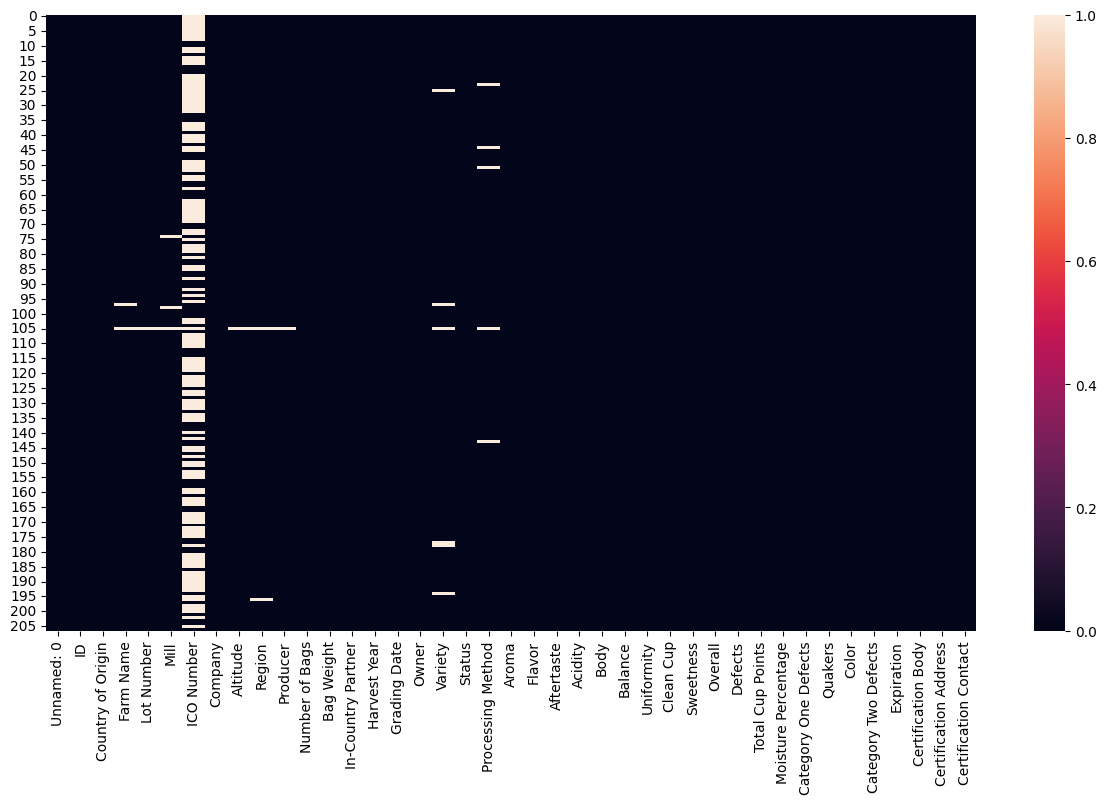

In [27]:
#Displaying a heat map for missing values of the dataset. 
plt.figure(figsize=(15,8))
sns.heatmap(df_qa_coffee_copy.isnull())

With this we can also confirm that the ICO number column it's the column with the most missing value in the dataset. 

# Univarity Analysis

The next section correspond to an univarity analysis looking insights in each variable of coffee quality parameters. The focuse of this section it's to see the data parameter by parameter and then to identify the relationship between variables to answer business questions. First we slice the dataframe using the **index_location (i.loc)** attribute of pandas to focus only in the most common coffee parameters: flavor, aroma, body, acidity, uniformity, balance, aftertaste, clean cup, swetness, defects and total cup points.

Also it's added the name of the countries of the dataset to see the parameters by country and them sorted in alphabetical order. 

In [36]:
#Extracting information of interest
df_coffee_parameters= df_qa_coffee_copy.iloc[: , 21:33]

#Country columns 
Countries = df_qa_coffee_copy['Country of Origin']
#Modification ot include the countries 
df_coffee_parameters_countries = df_coffee_parameters.assign(Country=Countries)

#Sorting values by country name
df_coffee_parameters_countries = df_coffee_parameters_countries.sort_values(by='Country', ascending=True)
df_coffee_parameters_countries.head(10)

,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Country
206,7.08,6.67,6.83,6.83,6.67,10.0,10.0,10.0,6.67,0.0,78.00,11.3,Brazil
129,7.50,7.50,7.83,7.67,7.50,10.0,10.0,10.0,7.67,0.0,83.25,11.6,Brazil
56,7.92,7.75,7.92,7.67,7.83,10.0,10.0,10.0,7.83,0.0,84.75,11.2,Brazil
158,7.58,7.50,7.50,7.67,7.42,10.0,10.0,10.0,7.33,0.0,82.50,11.8,Brazil
183,7.50,7.42,7.33,7.33,7.33,10.0,10.0,10.0,7.42,0.0,81.83,11.3,Brazil
184,7.50,7.58,7.33,7.33,7.25,10.0,10.0,10.0,7.33,0.0,81.75,11.1,Brazil
25,8.08,7.83,7.92,8.00,7.83,10.0,10.0,10.0,8.00,0.0,85.50,11.3,Brazil
194,7.42,7.25,7.25,7.17,7.25,10.0,10.0,10.0,7.25,0.0,81.00,10.6,Brazil
201,7.17,7.17,7.08,7.17,7.17,10.0,10.0,10.0,7.17,0.0,80.17,11.6,Brazil
202,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.08,11.4,Brazil


As we can identify they are various farms in each country that produce coffee. We are going to focuse on identify and make a ponderation of all the farms to give an specific value for each country in each of the coffee quality parameters in this dataset. Also we are going to focuse on what makes a good total cup points based on all the qualities mentioned before.  

# Statistical Summary


We can see the statistical information of the coffee parameters using the **describe** attribute of pandas library. With this we can gain a little of insights related with the coffee parameters to see what are the tendencies around the world for the coffee cups. 

In [25]:
#Setting the statistical information of the coffee parameters. The T stands for Transpose. 
df_coffee_parameters.describe().T

,count,mean,std,min,25%,50%,75%,max
Flavor,207.0,7.744734,0.279613,6.75,7.58,7.75,7.920,8.50
Aftertaste,207.0,7.599758,0.275911,6.67,7.42,7.58,7.750,8.42
Acidity,207.0,7.690290,0.259510,6.83,7.50,7.67,7.875,8.58
Body,207.0,7.640918,0.233499,6.83,7.50,7.67,7.750,8.25
Balance,207.0,7.644058,0.256299,6.67,7.50,7.67,7.790,8.42
Uniformity,207.0,9.990338,0.103306,8.67,10.00,10.00,10.000,10.00
Clean Cup,207.0,10.000000,0.000000,10.00,10.00,10.00,10.000,10.00
Sweetness,207.0,10.000000,0.000000,10.00,10.00,10.00,10.000,10.00
Overall,207.0,7.676812,0.306359,6.67,7.50,7.67,7.920,8.58
Defects,207.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


With only one code line we can gain a lot of information in the coffee parameters!. Let's explore now. 
First of all as we can see before the total number of records in the dataset it's 207, and all the parameters we have in this dataset are complete. As we can talk before normally the scale that ranges for the coffee parameters are between 7 and 9 for the scores in each category in a scale from 1 to 10. Less than 7 means a poor quality of coffee and greater than 9 means a special type of coffee, which drops in the category of "excellency cup". This scale it's more related for flavor, aftertaste, acidity, body, balance and uniformity. As for the clean cup wich means that there it's not flavor or aroma that's not related with coffee a qualification of 10 means that everyting it's coffee alike. 

As we can see for all the maximum values for each parameter they're less than 9, indicating that in the International Coffee Quality Association there's not an "excellency cup" until the date of this dataset was analyzed. Also we can identify that there are various coffee that fall in the category of poor quality if we take the range mentioned before. The mean value for all the categories correspond between 7.6 and 7.8 which means that fall in a good category for the parameters. 

The most importantion information of this statistical summary it's related with the total cup points which it's the ponderated score of all the quality parameters to cataloge a good coffee cup. The minimum coffee cup it's **78.00** and this comes from **Brazil** and from **El Salvador**. For the maximum coffee cup it's **89.33** which comes from **Colombia**. With this we can gain the insight that **Colombia has an excellent coffee cup based on the quality of the dataset**. 

Now le'ts explore with a few visualizations each variable to check for the distributions of coffee parameters. 

### Total Cup Points

Mean value for Total Cup Points:  83.70657004830917 
Median value for Total Cup Points:  83.75 
Max value for Total Cup Points:  89.33 
Min value for Total Cup Points:  78.0


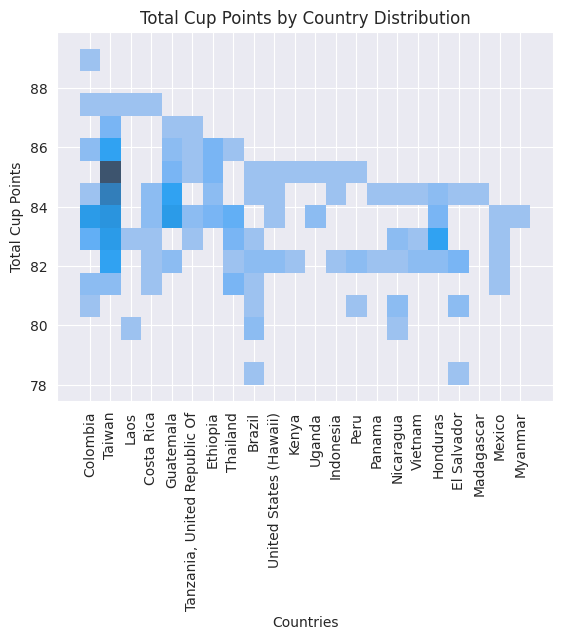

In [139]:
#Printing statistical information of total cup points: 
print("Mean value for Total Cup Points: ", df_coffee_parameters['Total Cup Points'].mean(), 
      "\nMedian value for Total Cup Points: ", df_coffee_parameters['Total Cup Points'].median(), 
      "\nMax value for Total Cup Points: ", df_coffee_parameters['Total Cup Points'].max(), 
      "\nMin value for Total Cup Points: ", df_coffee_parameters['Total Cup Points'].min())

#Explore a distribution plot of the total cup points by country
fig, ax1 = plt.subplots()
sns.set_style("darkgrid")
sp1= sns.histplot(data=df_coffee_parameters, x=Countries, y= df_coffee_parameters_countries['Total Cup Points'], ax=ax1)
ax1.set_xlabel('Countries')
ax1.set_ylabel('Total Cup Points')
ax1.set_title('Total Cup Points by Country Distribution')
legend = ax1.get_legend()
plt.xticks(rotation=90)
plt.show()


With the histogram we can identify that the country that has a more volume of coffee production it's Colombia with Total Cup Points between 84 and 86. It's good to see that Honduras, my origin country, has a good total cup points between 82 and 84 which makes the coffee of Honduras valuable for the global market. 

Let's look now the distribution of the values for Total Cup Points.

Mean value for Total Cup Points:  83.70657004830917 
Median value for Total Cup Points:  83.75 
Max value for Total Cup Points:  89.33 
Min value for Total Cup Points:  78.0


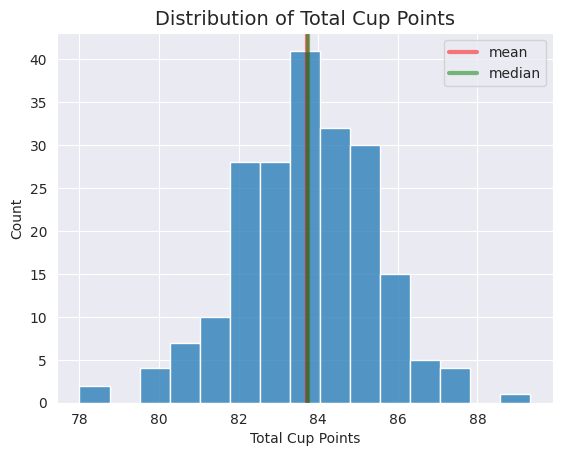

In [138]:
#Printing statistical information of total cup points: 
print("Mean value for Total Cup Points: ", df_coffee_parameters['Total Cup Points'].mean(), 
      "\nMedian value for Total Cup Points: ", df_coffee_parameters['Total Cup Points'].median(), 
      "\nMax value for Total Cup Points: ", df_coffee_parameters['Total Cup Points'].max(), 
      "\nMin value for Total Cup Points: ", df_coffee_parameters['Total Cup Points'].min())

#Histogram for the distribution of total cup points
sns.set_style("darkgrid")
sns.histplot(df_coffee_parameters['Total Cup Points'], kde=False)
plt.axvline(x=df_coffee_parameters['Total Cup Points'].mean(), linewidth=3, color='r', label='mean', alpha=0.5)
plt.axvline(x=df_coffee_parameters['Total Cup Points'].median(), linewidth=3, color='g', label='median', alpha=0.5)

#Setting labels, title and legend
plt.xlabel('Total Cup Points')
plt.ylabel('Count')
plt.title('Distribution of Total Cup Points', size=14)
plt.legend(["mean", "median"])
plt.show()

We can identify two outliers in the distribution of the total cup points, which are related with the maximum and minimum value reported before. 

### Processing Method

We can look for the most used processing methods of coffee around the world by identifying the number of counts for each method. 

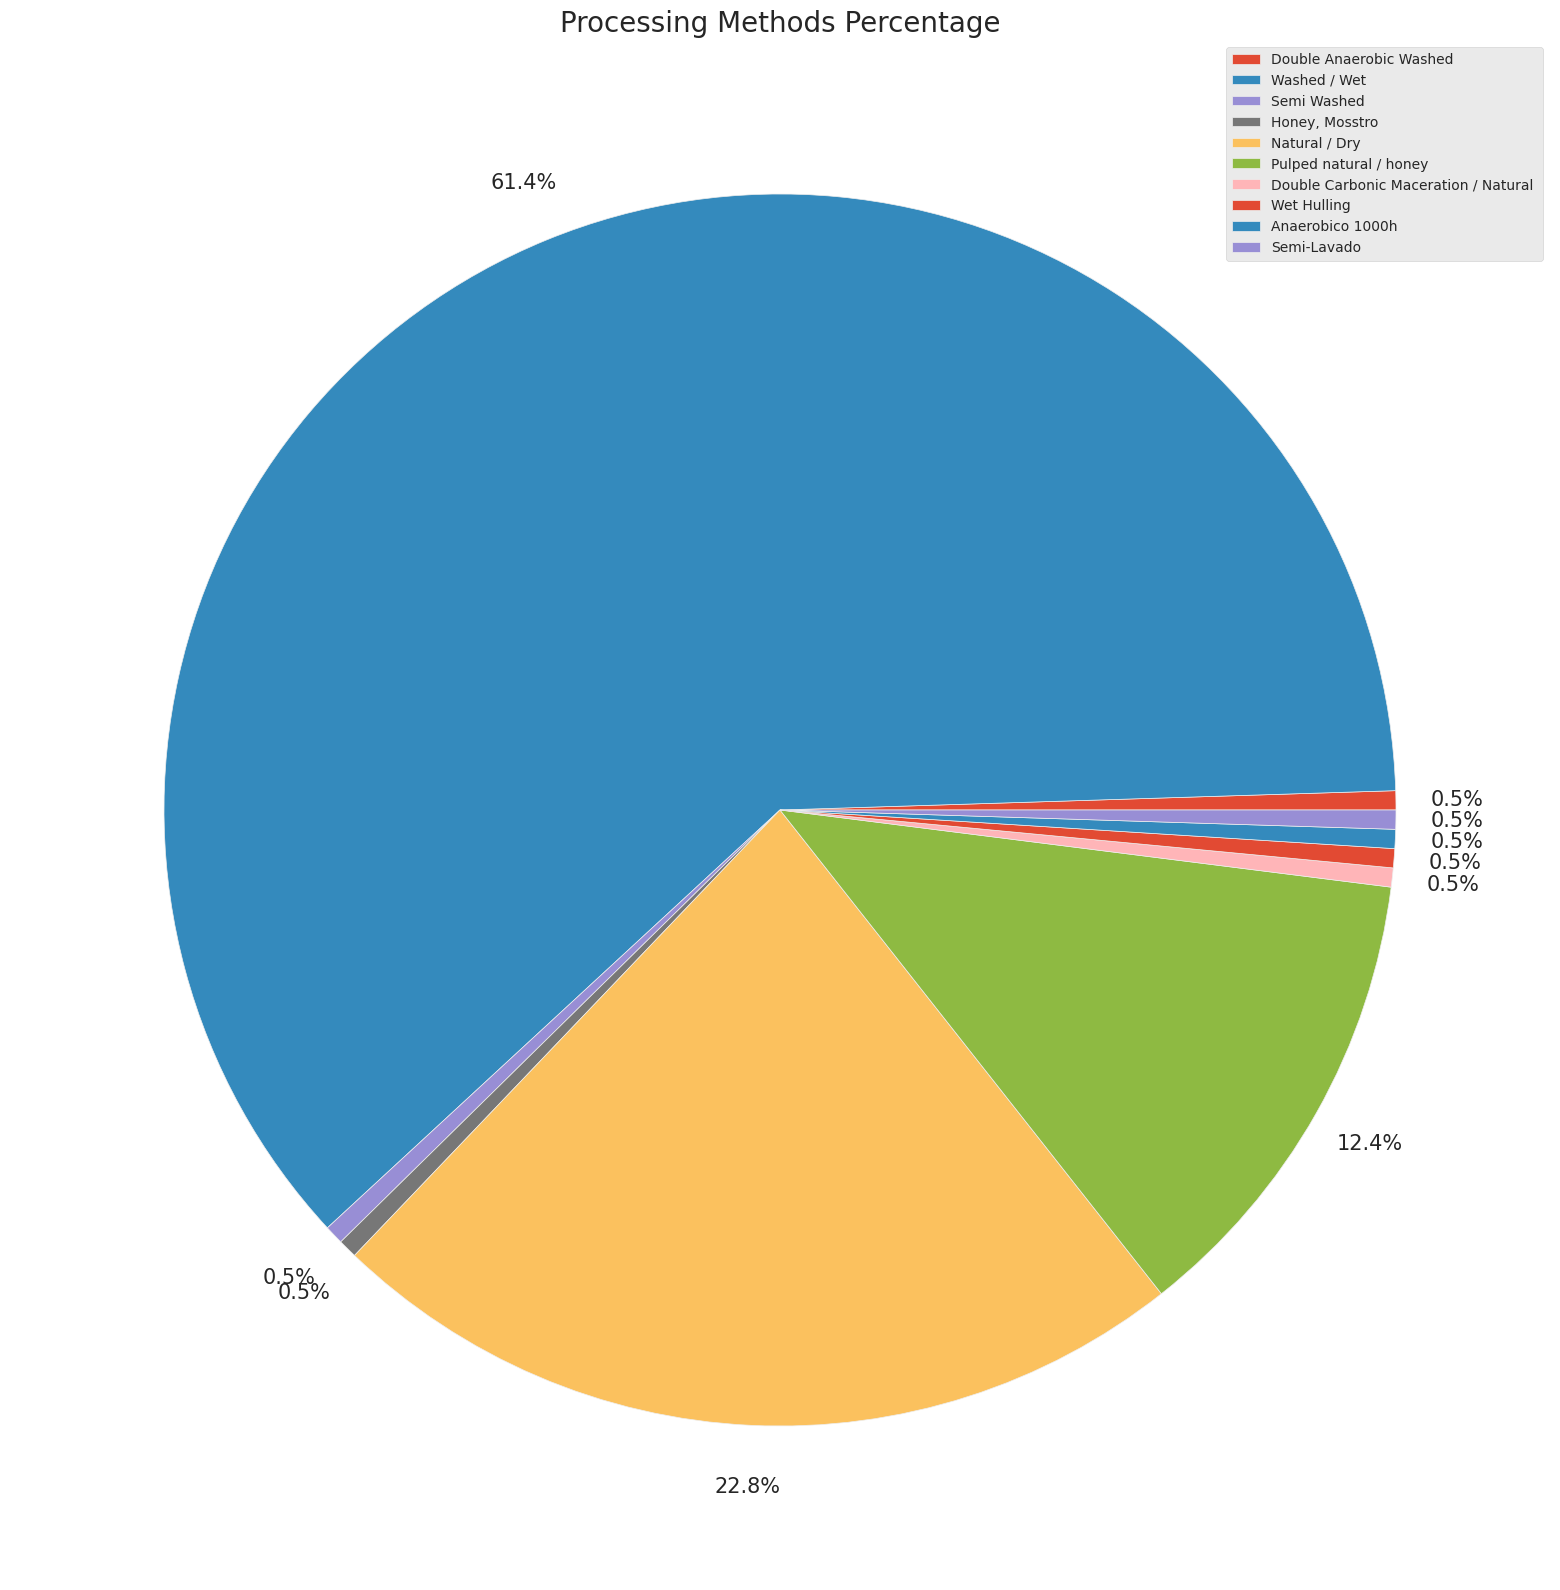

In [141]:
#Constructing a percentage of the processing methods. 
from collections import Counter
total_processing_methods = df_qa_coffee_copy['Processing Method'].dropna().count()
processing_methods = df_qa_coffee_copy['Processing Method'].dropna()
method_processing_counts = Counter(processing_methods)
method_processings = pd.DataFrame.from_dict(method_processing_counts, orient='index', columns=["Percentage"])
percentage_methods = round(method_processings['Percentage']/total_processing_methods*100,2)
label= ['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed', 'Honey, Mosstro', 'Natural / Dry', 
'Pulped natural / honey', 'Double Carbonic Maceration / Natural ', 'Wet Hulling', 'Anaerobico 1000h', 'Semi-Lavado']

#Constructing a histogram for the processing methods.
plt.style.use("ggplot")
plt.figure(figsize=(20,20)) 
pie =plt.pie(percentage_methods, autopct='%1.1f%%', pctdistance = 1.1, labeldistance = 1.5, textprops={'fontsize':15})

#Label, Legend and Title. 
plt.title('Processing Methods Percentage', size=20)
plt.legend(pie[0], label, loc="upper right", bbox_to_anchor = (1,1))
plt.show()

We can identify that the most used processing method it's the "Washed / Wet" method. Wet processed (washed) coffees are dried without the cherry. Washed coffee’s are de-pulped then usually fermented to promote the separation of any remaining pectin still stuck to the bean and parchment, then washed clean prior to drying. 

### Acidity

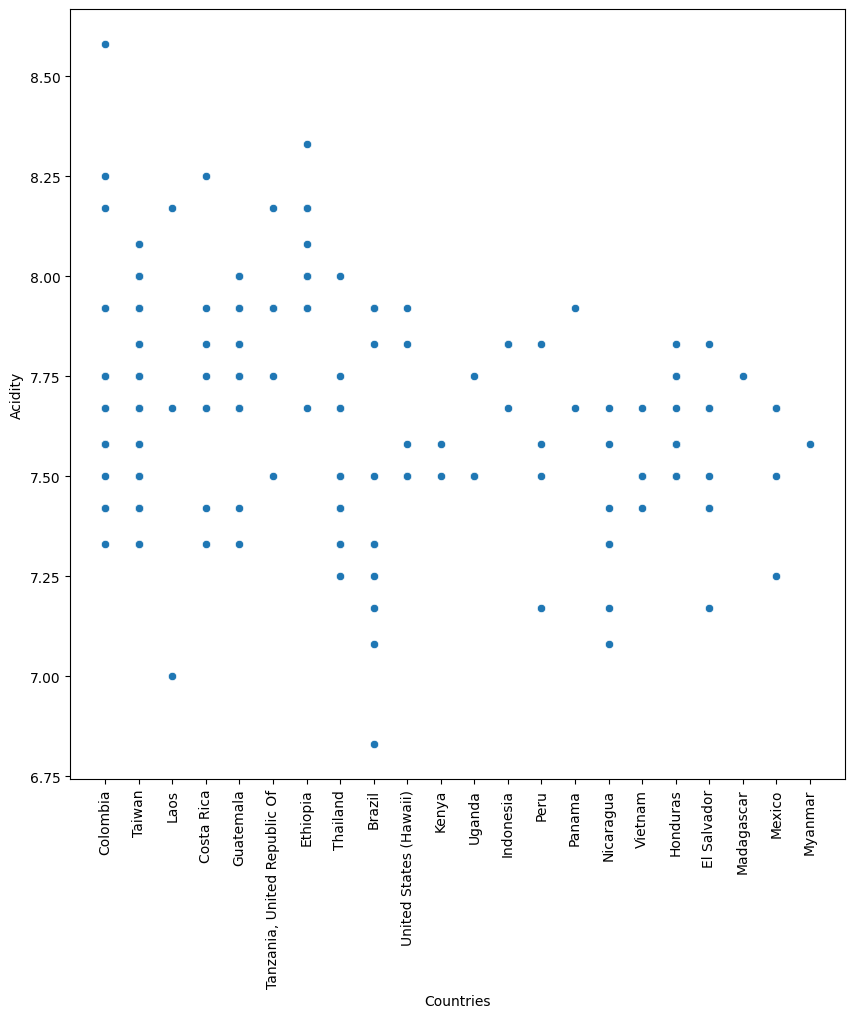

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_coffee_parameters, x=Countries, y= df_coffee_parameters_countries['Acidity'])
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.show()